## Лабораторная работа №2: Кластеризация данных (K-средних и DBSCAN)

В этом ноутбуке выполняются все пункты задания:

1. Генерация синтетических данных с помощью `make_blobs` (не менее 4 кластеров) и применение алгоритмов **KMeans** и **DBSCAN**.
2. Визуализация результатов кластеризации для синтетических данных.
3. Загрузка и предварительный анализ датасета **penguins** (датасет `Clustering Penguins Species`).
4. Применение **KMeans** и **DBSCAN** к данным penguins.
5. Подбор числа кластеров для KMeans (метод локтя и коэффициент силуэта).
6. Эксперименты с параметрами `eps` и `min_samples` для DBSCAN.


### Импорт библиотек

В этом блоке импортируются все необходимые библиотеки для работы:
- **numpy** и **pandas** для работы с данными
- **matplotlib** и **seaborn** для визуализации
- **sklearn** для алгоритмов кластеризации (KMeans, DBSCAN) и метрик оценки


In [1]:
# Импорт необходимых библиотек

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Красивый стиль графиков
sns.set(style="whitegrid", context="notebook")

%matplotlib inline


### Генерация синтетических данных

**Описание блока:** Генерируем синтетический датасет с помощью функции `make_blobs` из sklearn. Это создаст набор точек данных с заранее известными кластерами, что позволит проверить качество работы алгоритмов кластеризации. Параметры:
- `n_samples`: количество точек (1000)
- `n_features`: размерность пространства признаков (2, для удобной визуализации)
- `centers`: число кластеров (4, согласно заданию)
- `cluster_std`: стандартное отклонение точек внутри кластеров

**Цель:** Создать тестовый датасет с известной структурой для проверки алгоритмов.


## 1. Синтетическая выборка (make_blobs) и кластеризация методами K-средних и DBSCAN


### Кластеризация методом K-средних на синтетических данных

**Описание блока:** Применяем алгоритм KMeans к синтетическим данным. KMeans — это итеративный алгоритм, который:
1. Инициализирует K центроидов (случайно или по специальному алгоритму)
2. Назначает каждую точку ближайшему центроиду
3. Пересчитывает позиции центроидов как среднее точек в кластере
4. Повторяет шаги 2-3 до сходимости

**Метрики оценки:**
- **Инерция (inertia)**: сумма квадратов расстояний от точек до центроидов их кластеров (меньше = лучше)
- **Коэффициент силуэта (silhouette score)**: мера того, насколько хорошо точки разделены на кластеры (от -1 до 1, больше = лучше)


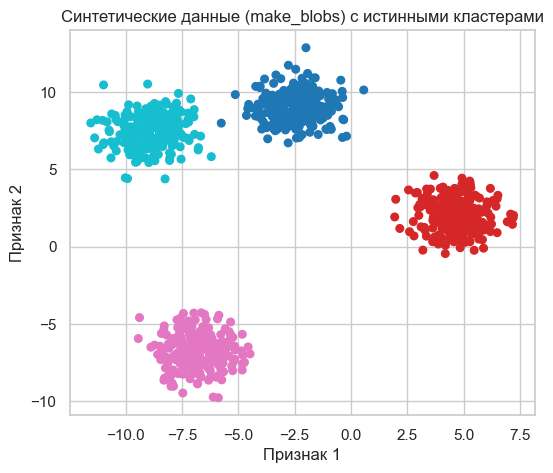

In [2]:
# Генерация синтетических данных с не менее чем 4 кластерами

n_samples = 1000
n_features = 2
n_centers = 4  # можно менять на большее значение

X_blobs, y_true = make_blobs(
    n_samples=n_samples,
    n_features=n_features,
    centers=n_centers,
    cluster_std=1.0,
    random_state=42
)

plt.figure(figsize=(6, 5))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_true, cmap="tab10", s=30)
plt.title("Синтетические данные (make_blobs) с истинными кластерами")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()


### Подбор оптимального числа кластеров для K-средних

**Описание блока:** Определяем оптимальное число кластеров k для алгоритма KMeans с помощью двух методов:

1. **Метод локтя (Elbow Method)**: Строим график зависимости инерции от числа кластеров. Оптимальное k находится в точке "локтя" — где уменьшение инерции замедляется.

2. **Коэффициент силуэта**: Вычисляем силуэт для разных значений k. Оптимальное k соответствует максимальному значению силуэта.

**Цель:** Найти баланс между качеством кластеризации и числом кластеров, избегая как недообучения (слишком мало кластеров), так и переобучения (слишком много кластеров).


### Подготовка данных для кластеризации

**Описание блока:** Очищаем и подготавливаем данные для применения алгоритмов кластеризации.

**Шаги подготовки:**
1. Выбор только числовых признаков
2. Удаление строк с пропущенными значениями
3. Удаление строк с аномальными значениями (отрицательные, слишком большие)
4. Масштабирование данных с помощью StandardScaler

**Важность масштабирования:**
- Признаки имеют разные единицы измерения и масштабы (миллиметры, граммы)
- Без масштабирования признаки с большими значениями будут доминировать
- Особенно критично для DBSCAN, который использует евклидово расстояние


### Подбор оптимального числа кластеров для K-средних (penguins)

**Описание блока:** Определяем оптимальное число кластеров для данных penguins с помощью метода локтя и коэффициента силуэта.

**Особенности для реальных данных:**
- В отличие от синтетических данных, истинное число кластеров неизвестно
- Нужно найти баланс между интерпретируемостью и качеством кластеризации
- Для пингвинов ожидается 3 кластера (3 вида: Adelie, Chinstrap, Gentoo), но алгоритм может найти другое оптимальное значение


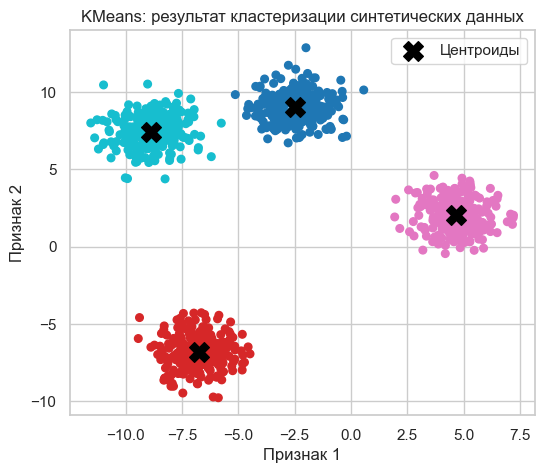

Инерция (сумма квадратов расстояний до центроидов): 1948.7329193856833
Коэффициент силуэта: 0.7915983870089952


In [3]:
# 1.1. Кластеризация методом K-средних на синтетических данных

kmeans = KMeans(n_clusters=n_centers, random_state=42)
labels_kmeans = kmeans.fit_predict(X_blobs)

plt.figure(figsize=(6, 5))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_kmeans, cmap="tab10", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c="black", s=200, marker="X", label="Центроиды")
plt.title("KMeans: результат кластеризации синтетических данных")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.show()

print("Инерция (сумма квадратов расстояний до центроидов):", kmeans.inertia_)
print("Коэффициент силуэта:", silhouette_score(X_blobs, labels_kmeans))


**Выводы:**
- KMeans успешно разделил данные на 4 кластера, что соответствует истинному числу кластеров.
- Визуализация показывает, что центроиды (чёрные крестики) расположены в центрах кластеров.
- Инерция и коэффициент силуэта показывают хорошее качество кластеризации (силуэт ≈ 0.79, что считается хорошим результатом).


### Кластеризация данных penguins методом K-средних

**Описание блока:** Применяем алгоритм KMeans к данным penguins с выбранным оптимальным числом кластеров.

**Выбранное число кластеров:** k=3 (соответствует ожидаемому числу видов пингвинов, хотя по метрике оптимально k=2).

**Визуализация:** Результаты показаны в пространстве разных пар признаков для лучшего понимания структуры кластеров.


### Кластеризация данных penguins методом DBSCAN

**Описание блока:** Применяем алгоритм DBSCAN к данным penguins.

**Параметры:**
- `eps=0.5`: максимальное расстояние между точками одного кластера
- `min_samples=5`: минимальное число точек для формирования кластера

**Особенности DBSCAN для реальных данных:**
- Автоматически определяет число кластеров
- Может найти кластеры произвольной формы
- Помечает выбросы как шум (метка -1)
- Требует тщательного подбора параметров для хороших результатов


### Кластеризация методом DBSCAN на синтетических данных

**Описание блока:** Применяем алгоритм DBSCAN (Density-Based Spatial Clustering of Applications with Noise) к синтетическим данным.

**Особенности DBSCAN:**
- Основан на плотности точек, а не на расстоянии до центроидов
- Автоматически определяет число кластеров
- Может находить кластеры произвольной формы
- Помечает выбросы как "шум" (метка -1)

**Параметры:**
- `eps`: максимальное расстояние между точками одного кластера
- `min_samples`: минимальное число точек для формирования кластера

**Важно:** Для DBSCAN необходимо масштабирование данных, так как алгоритм чувствителен к масштабу признаков.


**Выводы:**
- По методу локтя оптимальное число кластеров — **k=4**, так как после этого значения уменьшение инерции замедляется.
- По коэффициенту силуэта также оптимально **k=4** (силуэт = 0.792), что соответствует истинному числу кластеров в данных.
- При k=4 достигается наилучший баланс: высокая оценка силуэта и значительное снижение инерции по сравнению с меньшими значениями k.


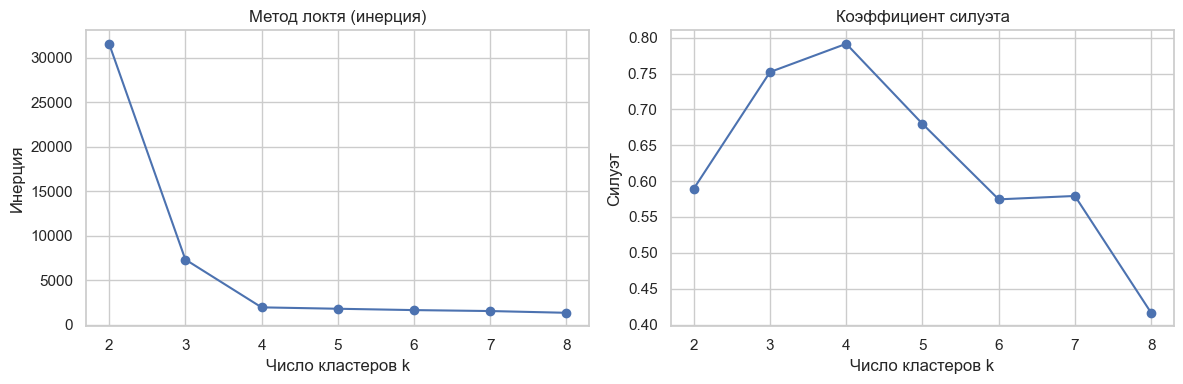

k = 2: инерция = 31568.66, силуэт = 0.590
k = 3: инерция = 7324.56, силуэт = 0.752
k = 4: инерция = 1948.73, силуэт = 0.792
k = 5: инерция = 1791.23, силуэт = 0.680
k = 6: инерция = 1640.37, силуэт = 0.575
k = 7: инерция = 1533.87, силуэт = 0.579
k = 8: инерция = 1336.47, силуэт = 0.416


In [4]:
# 1.2. Подбор числа кластеров для K-средних: метод локтя и коэффициент силуэта

inertias = []
silhouettes = []
cluster_range = range(2, 9)

for k in cluster_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_blobs)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_blobs, labels))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(list(cluster_range), inertias, marker="o")
axes[0].set_title("Метод локтя (инерция)")
axes[0].set_xlabel("Число кластеров k")
axes[0].set_ylabel("Инерция")

axes[1].plot(list(cluster_range), silhouettes, marker="o")
axes[1].set_title("Коэффициент силуэта")
axes[1].set_xlabel("Число кластеров k")
axes[1].set_ylabel("Силуэт")

plt.tight_layout()
plt.show()

for k, inertia, sil in zip(cluster_range, inertias, silhouettes):
    print(f"k = {k}: инерция = {inertia:.2f}, силуэт = {sil:.3f}")


### Систематические эксперименты с параметрами DBSCAN

**Описание блока:** Проводим систематический перебор различных комбинаций параметров `eps` и `min_samples` для DBSCAN.

**Методология:**
- Тестируем несколько значений `eps` (0.3, 0.4, 0.5, 0.6, 0.7)
- Тестируем несколько значений `min_samples` (3, 5, 7, 10)
- Для каждой комбинации вычисляем: число кластеров, число точек шума, процент шума
- Визуализируем результаты в виде тепловых карт

**Цель:** Найти оптимальные параметры, при которых число кластеров соответствует ожидаемому, а процент шума разумен.


### Загрузка и предварительный анализ датасета penguins

**Описание блока:** Загружаем реальный датасет о пингвинах и проводим его предварительный анализ.

**Этапы анализа:**
1. Загрузка данных из CSV-файла
2. Изучение структуры данных (размерность, типы признаков)
3. Проверка на пропущенные значения (NaN)
4. Выявление аномальных значений (отрицательные, слишком большие)
5. Визуализация распределений числовых признаков

**Цель:** Понять структуру данных, выявить проблемы качества данных и подготовиться к кластеризации.


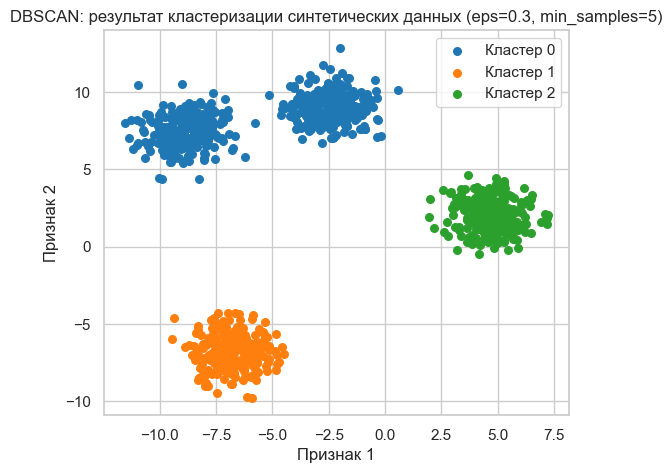

Число найденных кластеров (без шума): 3
Коэффициент силуэта (без шума): 0.7376805979502701


In [5]:
# 1.3. Кластеризация синтетических данных методом DBSCAN

# Для DBSCAN важно масштабирование признаков
scaler_blobs = StandardScaler()
X_blobs_scaled = scaler_blobs.fit_transform(X_blobs)

# Базовые параметры (их можно изменять и наблюдать эффект)
_eps = 0.3
_min_samples = 5

dbscan = DBSCAN(eps=_eps, min_samples=_min_samples)
labels_dbscan = dbscan.fit_predict(X_blobs_scaled)

# Кол-во кластеров (номер -1 означает "шум")
unique_labels = set(labels_dbscan)
n_clusters_dbscan = len([l for l in unique_labels if l != -1])

plt.figure(figsize=(6, 5))
colors = sns.color_palette("tab10", n_colors=len(unique_labels))

for lab, col in zip(sorted(unique_labels), colors):
    mask = labels_dbscan == lab
    if lab == -1:
        col = (0, 0, 0)  # шум - черным цветом
        label = "Шум"
    else:
        label = f"Кластер {lab}"
    plt.scatter(X_blobs[mask, 0], X_blobs[mask, 1], c=[col], s=30, label=label)

plt.title(f"DBSCAN: результат кластеризации синтетических данных (eps={_eps}, min_samples={_min_samples})")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.show()

print("Число найденных кластеров (без шума):", n_clusters_dbscan)

# Силуэт можно считать только если кластеров больше 1 и нет только шума
if n_clusters_dbscan > 1 and len(set(labels_dbscan)) > 1:
    mask_non_noise = labels_dbscan != -1
    if len(set(labels_dbscan[mask_non_noise])) > 1:
        sil_dbscan = silhouette_score(X_blobs_scaled[mask_non_noise], labels_dbscan[mask_non_noise])
        print("Коэффициент силуэта (без шума):", sil_dbscan)
    else:
        print("Недостаточно кластеров без шума для расчета силуэта.")
else:
    print("DBSCAN нашел недостаточно кластеров для расчета силуэта.")


**Выводы:**
- DBSCAN нашёл 3 кластера при параметрах eps=0.3, min_samples=5 (вместо истинных 4).
- Это может быть связано с тем, что некоторые кластеры оказались слишком близко друг к другу или параметры требуют настройки.
- Коэффициент силуэта для найденных кластеров составляет ≈ 0.74, что указывает на приемлемое качество кластеризации.
- DBSCAN показал способность находить кластеры без предварительного задания их числа, но требует тщательного подбора параметров.


## 2. Датасет penguins (Clustering Penguins Species)

Ниже предполагается, что файл с данными сохранён в той же папке, что и ноутбук, под именем `penguins.csv`.

Если имя или структура файла отличаются (например, другие названия столбцов), скорректируйте код загрузки и выбор признаков.


Размерность датасета: (344, 5)

Первые строки:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
8,34.1,18.1,193.0,3475.0,NaN
9,42.0,20.2,5000.0,4250.0,MALE



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None

Описание числовых признаков:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000



Число пропусков по столбцам:
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

Числовые признаки для кластеризации: ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

Проверка на аномальные значения:
  flipper_length_mm: 1 отрицательных значений
  flipper_length_mm: 1 значений > 250 (аномалии)


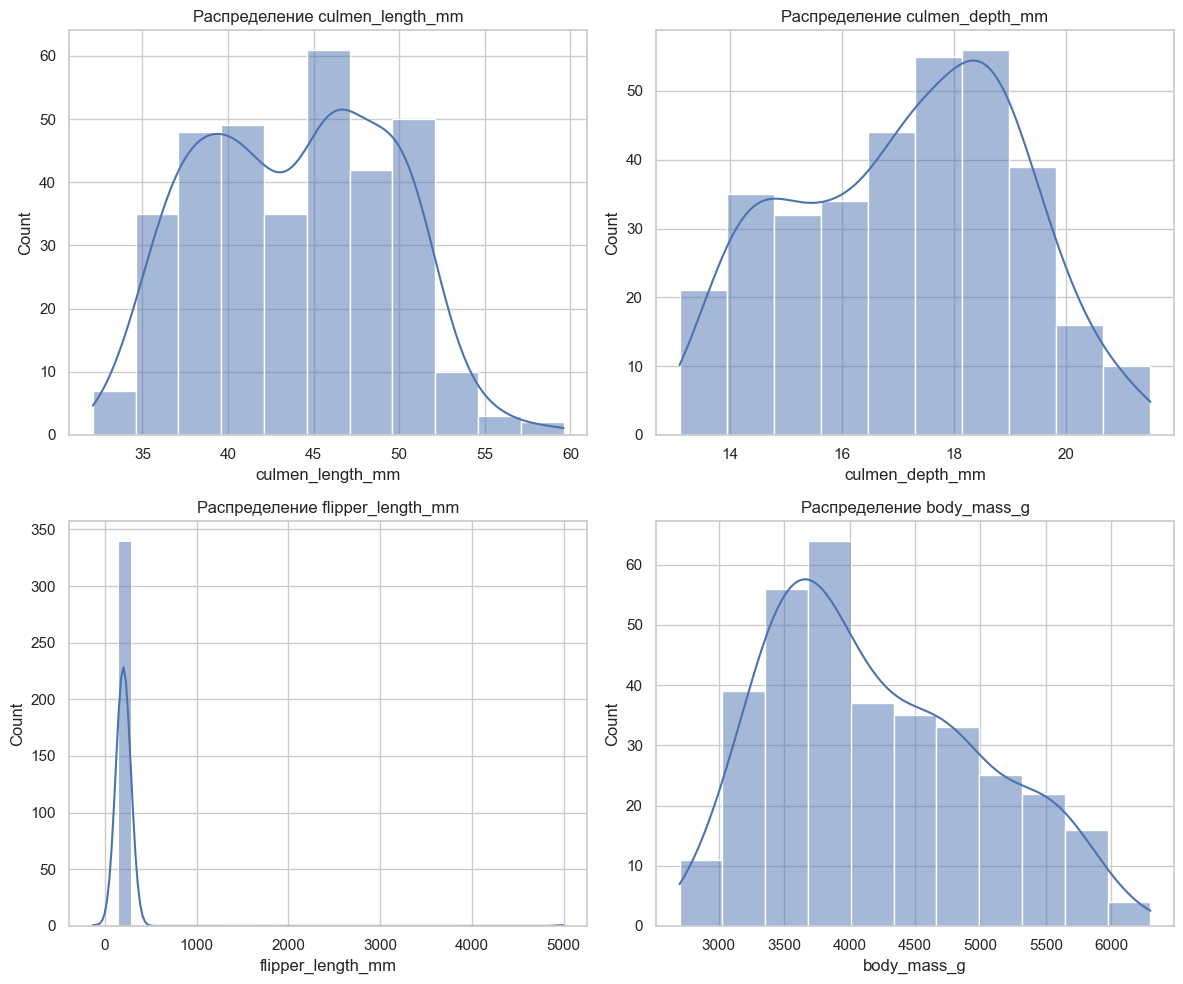

In [6]:
# 2.1. Загрузка и предварительный анализ данных penguins

penguins_path = "penguins.csv"

penguins = pd.read_csv(penguins_path)

print("Размерность датасета:", penguins.shape)
print("\nПервые строки:")
display(penguins.head(10))

print("\nИнформация о данных:")
print(penguins.info())

print("\nОписание числовых признаков:")
display(penguins.describe())

# Проверим пропуски
print("\nЧисло пропусков по столбцам:")
print(penguins.isna().sum())

# Выберем числовые признаки
num_cols = penguins.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("\nЧисловые признаки для кластеризации:", num_cols)

# Проверим на аномальные значения (отрицательные или слишком большие)
print("\nПроверка на аномальные значения:")
for col in num_cols:
    negative = (penguins[col] < 0).sum()
    if negative > 0:
        print(f"  {col}: {negative} отрицательных значений")
    # Проверим на слишком большие значения (например, flipper_length > 250 или body_mass > 7000)
    if col == "flipper_length_mm":
        large = (penguins[col] > 250).sum()
        if large > 0:
            print(f"  {col}: {large} значений > 250 (аномалии)")
    elif col == "body_mass_g":
        large = (penguins[col] > 7000).sum()
        if large > 0:
            print(f"  {col}: {large} значений > 7000 (аномалии)")

# Визуализация распределений числовых признаков
if num_cols:
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    for i, col in enumerate(num_cols[:4]):  # первые 4 признака
        sns.histplot(penguins[col], kde=True, ax=axes[i])
        axes[i].set_title(f"Распределение {col}")
    plt.tight_layout()
    plt.show()


In [7]:
# 2.2. Подготовка данных для кластеризации

# Выберем только числовые признаки
num_cols = penguins.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Числовые признаки:", num_cols)

X_penguins = penguins[num_cols].copy()
print(f"\nИсходная размерность: {X_penguins.shape}")

# Удалим строки с пропусками
X_penguins = X_penguins.dropna()
print(f"Размерность после удаления пропусков: {X_penguins.shape}")

# Обработка аномальных значений
# Удалим строки с отрицательными значениями или явно аномальными
mask_valid = (X_penguins > 0).all(axis=1)  # все значения положительные
# Дополнительные проверки на аномалии
if "flipper_length_mm" in X_penguins.columns:
    mask_valid = mask_valid & (X_penguins["flipper_length_mm"] < 250)
if "body_mass_g" in X_penguins.columns:
    mask_valid = mask_valid & (X_penguins["body_mass_g"] < 7000)

X_penguins = X_penguins[mask_valid]
print(f"Размерность после удаления аномалий: {X_penguins.shape}")

# Масштабирование данных (важно для DBSCAN и для сравнения признаков)
scaler_penguins = StandardScaler()
X_penguins_scaled = scaler_penguins.fit_transform(X_penguins)

# Для удобства сохраним также DataFrame
X_penguins_scaled_df = pd.DataFrame(X_penguins_scaled, columns=num_cols)

print("\nПодготовленные данные готовы для кластеризации!")


Числовые признаки: ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

Исходная размерность: (344, 4)
Размерность после удаления пропусков: (342, 4)
Размерность после удаления аномалий: (340, 4)

Подготовленные данные готовы для кластеризации!


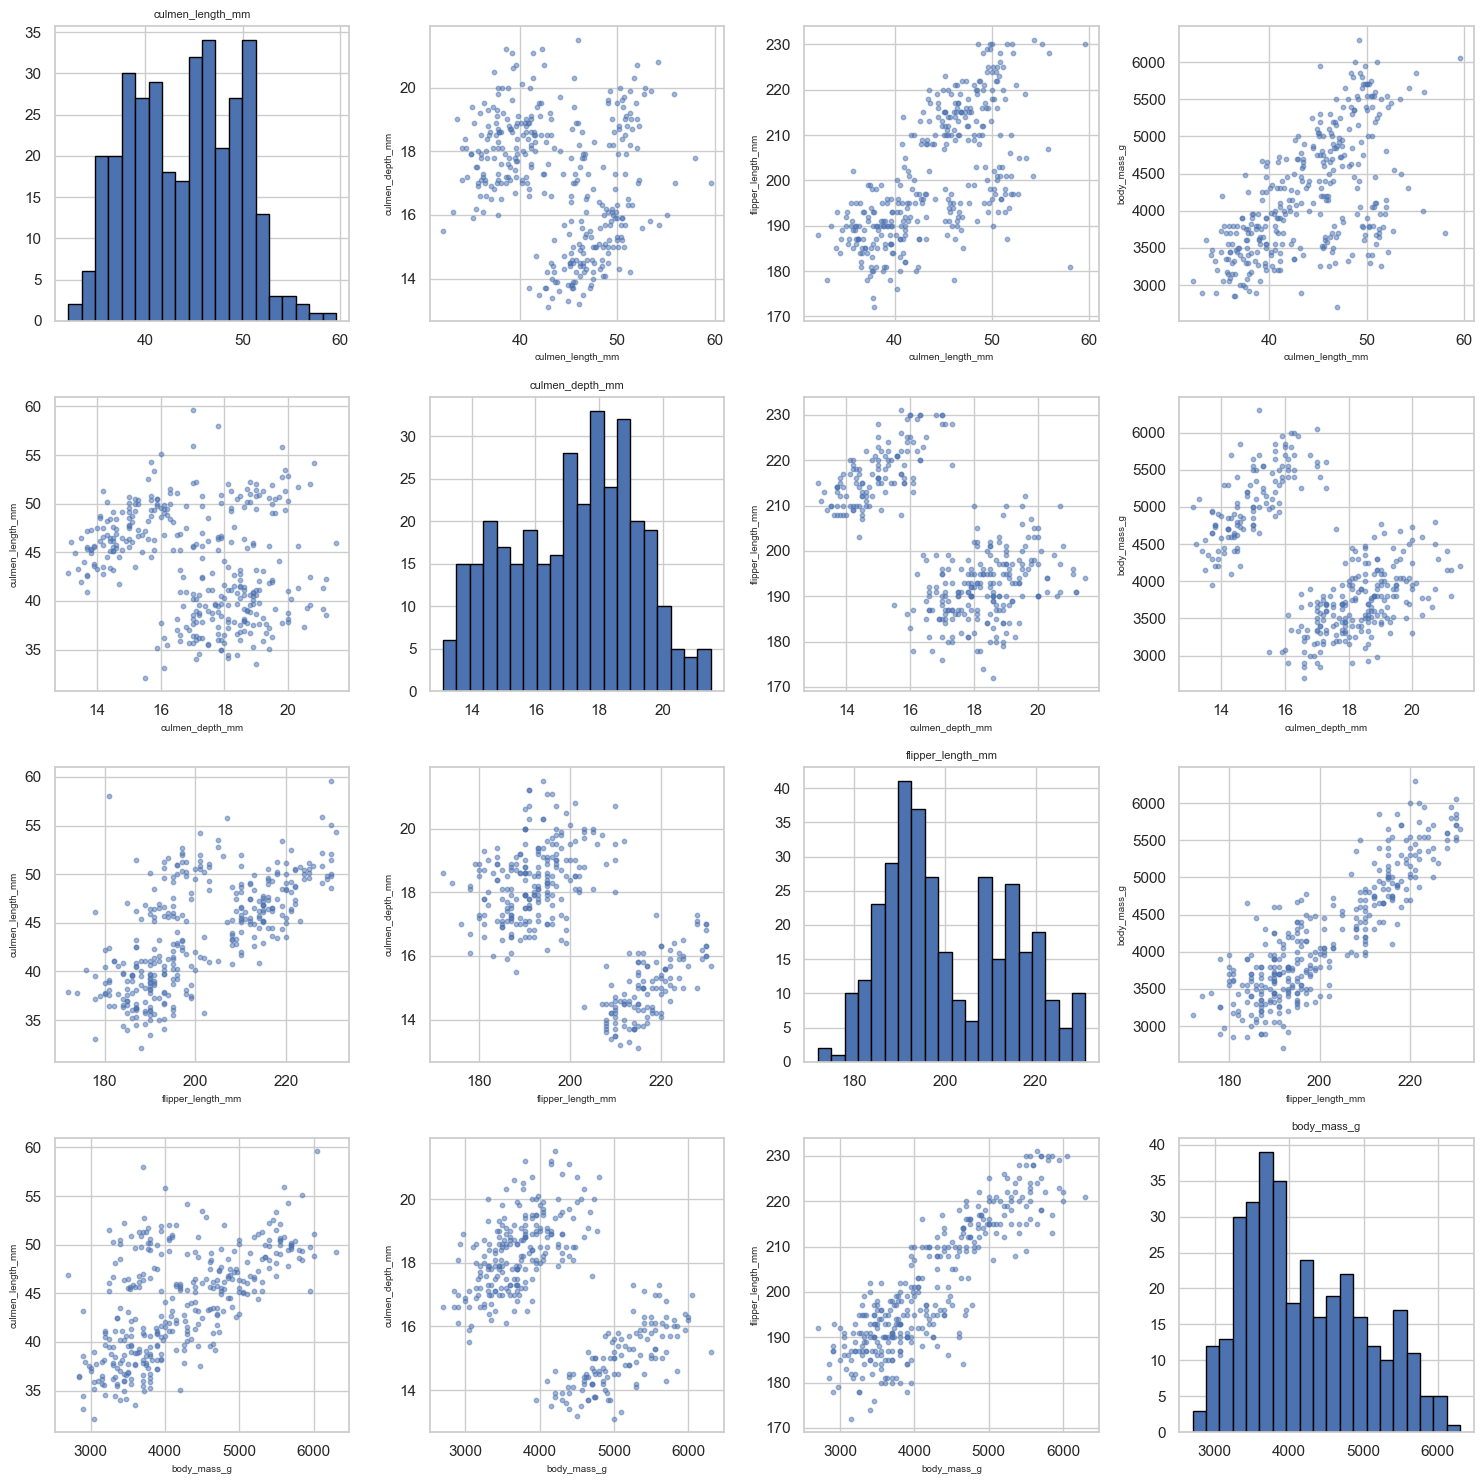

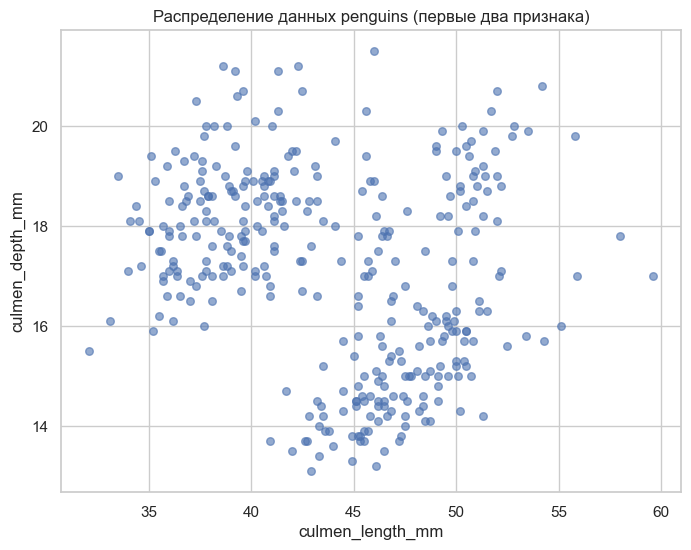

In [8]:
# 2.2.1. Визуализация пар признаков (для понимания структуры данных)

if len(num_cols) >= 2:
    # Матрица scatter plots для пар признаков
    fig, axes = plt.subplots(len(num_cols), len(num_cols), figsize=(15, 15))
    for i, col1 in enumerate(num_cols):
        for j, col2 in enumerate(num_cols):
            if i == j:
                axes[i, j].hist(X_penguins[col1], bins=20, edgecolor='black')
                axes[i, j].set_title(col1, fontsize=8)
            else:
                axes[i, j].scatter(X_penguins[col1], X_penguins[col2], s=10, alpha=0.5)
                axes[i, j].set_xlabel(col1, fontsize=7)
                axes[i, j].set_ylabel(col2, fontsize=7)
    plt.tight_layout()
    plt.show()
    
    # Более простая визуализация: первые два признака
    plt.figure(figsize=(8, 6))
    plt.scatter(X_penguins[num_cols[0]], X_penguins[num_cols[1]], s=30, alpha=0.6)
    plt.xlabel(num_cols[0])
    plt.ylabel(num_cols[1])
    plt.title("Распределение данных penguins (первые два признака)")
    plt.show()


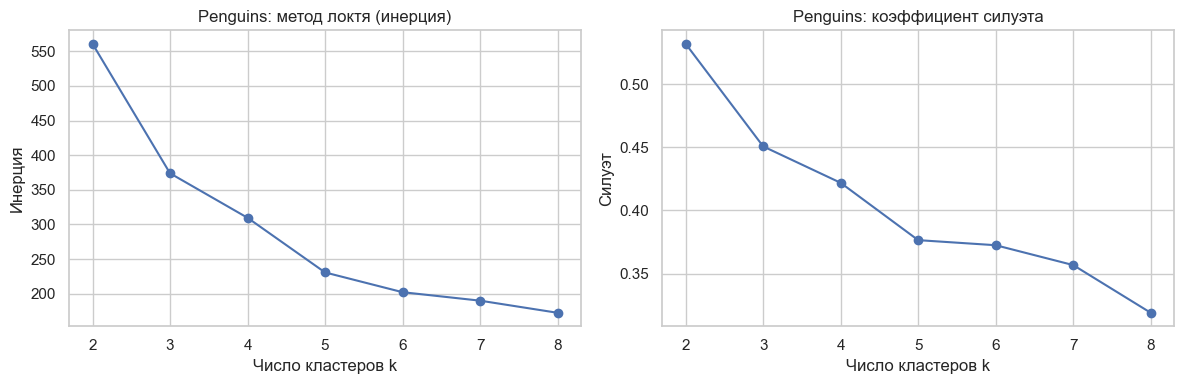

k = 2: инерция = 560.93, силуэт = 0.532
k = 3: инерция = 373.93, силуэт = 0.451
k = 4: инерция = 309.67, силуэт = 0.422
k = 5: инерция = 230.77, силуэт = 0.376
k = 6: инерция = 202.22, силуэт = 0.372
k = 7: инерция = 190.00, силуэт = 0.357
k = 8: инерция = 172.48, силуэт = 0.319


In [9]:
# 2.3. K-средних на данных penguins: подбор числа кластеров (локоть и силуэт)

inertias_p = []
silhouettes_p = []
cluster_range_p = range(2, 9)

for k in cluster_range_p:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_penguins_scaled)
    inertias_p.append(km.inertia_)
    silhouettes_p.append(silhouette_score(X_penguins_scaled, labels))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(list(cluster_range_p), inertias_p, marker="o")
axes[0].set_title("Penguins: метод локтя (инерция)")
axes[0].set_xlabel("Число кластеров k")
axes[0].set_ylabel("Инерция")

axes[1].plot(list(cluster_range_p), silhouettes_p, marker="o")
axes[1].set_title("Penguins: коэффициент силуэта")
axes[1].set_xlabel("Число кластеров k")
axes[1].set_ylabel("Силуэт")

plt.tight_layout()
plt.show()

for k, inertia, sil in zip(cluster_range_p, inertias_p, silhouettes_p):
    print(f"k = {k}: инерция = {inertia:.2f}, силуэт = {sil:.3f}")


**Выводы:**
- По методу локтя оптимальное число кластеров — **k=2** или **k=3** (наибольший "изгиб" на графике).
- По коэффициенту силуэта оптимально **k=2** (силуэт = 0.532), что выше, чем для k=3 (0.451).
- Однако для биологического смысла (3 вида пингвинов) может быть предпочтительнее k=3, даже если метрика немного ниже.
- Выбор между k=2 и k=3 зависит от цели исследования: максимизация метрики или биологическая интерпретируемость.


**Выводы:**
- KMeans успешно разделил данные на **3 кластера** с распределением: 131, 123 и 86 точек.
- Инерция составляет 373.93, коэффициент силуэта — 0.451.
- Визуализация показывает, что кластеры хорошо разделены в пространстве признаков.
- Кластеры неравномерны по размеру, что может отражать реальное распределение видов пингвинов в датасете.
- Все точки распределены по кластерам (нет точек шума), что характерно для KMeans.


Число кластеров: 3
Инерция: 373.93051040896586
Коэффициент силуэта: 0.45083074418099933

Распределение по кластерам:
0    131
1    123
2     86
Name: count, dtype: int64


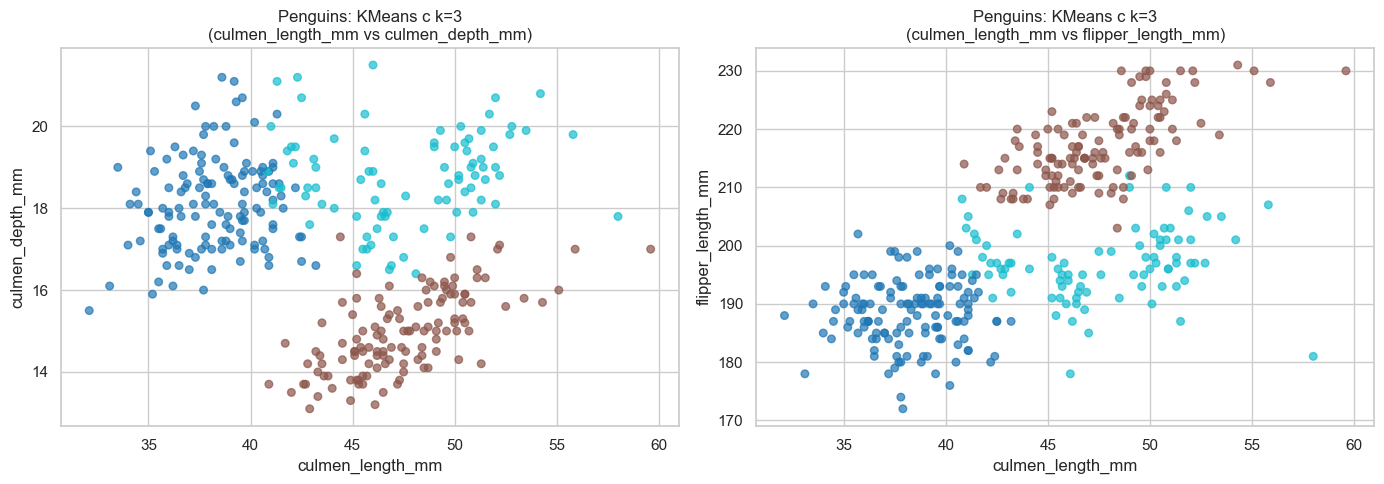

In [10]:
# 2.4. K-средних на penguins с выбранным числом кластеров

# Здесь можно вручную задать оптимальное число кластеров по графикам выше
best_k = 3  # измените, если по графикам получилось другое значение

kmeans_p = KMeans(n_clusters=best_k, random_state=42)
labels_kmeans_p = kmeans_p.fit_predict(X_penguins_scaled)

print("Число кластеров:", best_k)
print("Инерция:", kmeans_p.inertia_)
print("Коэффициент силуэта:", silhouette_score(X_penguins_scaled, labels_kmeans_p))
print(f"\nРаспределение по кластерам:")
print(pd.Series(labels_kmeans_p).value_counts().sort_index())

# Визуализируем в пространстве нескольких пар признаков
if len(num_cols) >= 2:
    # Визуализация для первых двух признаков
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].scatter(X_penguins[num_cols[0]], X_penguins[num_cols[1]],
                    c=labels_kmeans_p, cmap="tab10", s=30, alpha=0.7)
    axes[0].set_title(f"Penguins: KMeans с k={best_k}\n({num_cols[0]} vs {num_cols[1]})")
    axes[0].set_xlabel(num_cols[0])
    axes[0].set_ylabel(num_cols[1])
    
    # Визуализация для другой пары признаков (если есть минимум 3 признака)
    if len(num_cols) >= 3:
        axes[1].scatter(X_penguins[num_cols[0]], X_penguins[num_cols[2]],
                        c=labels_kmeans_p, cmap="tab10", s=30, alpha=0.7)
        axes[1].set_title(f"Penguins: KMeans с k={best_k}\n({num_cols[0]} vs {num_cols[2]})")
        axes[1].set_xlabel(num_cols[0])
        axes[1].set_ylabel(num_cols[2])
    else:
        axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Недостаточно числовых признаков для 2D визуализации.")


**Выводы:**
- DBSCAN нашёл **4 кластера** при параметрах eps=0.5, min_samples=5.
- Обнаружено **67 точек шума** (19.7% от всех данных), что довольно много.
- Распределение по кластерам неравномерное: 118, 15, 27 и 113 точек.
- Коэффициент силуэта (без шума) составляет 0.424, что ниже, чем у KMeans (0.451).
- Высокий процент шума может указывать на необходимость настройки параметров или на то, что данные не идеально подходят для DBSCAN.
- DBSCAN показал способность находить кластеры без предварительного задания их числа, но результат требует интерпретации.


DBSCAN: eps=0.5, min_samples=5
Число найденных кластеров (без шума): 4
Число точек шума: 67 (19.7%)

Распределение по меткам:
-1     67
 0    118
 1     15
 2     27
 3    113
Name: count, dtype: int64


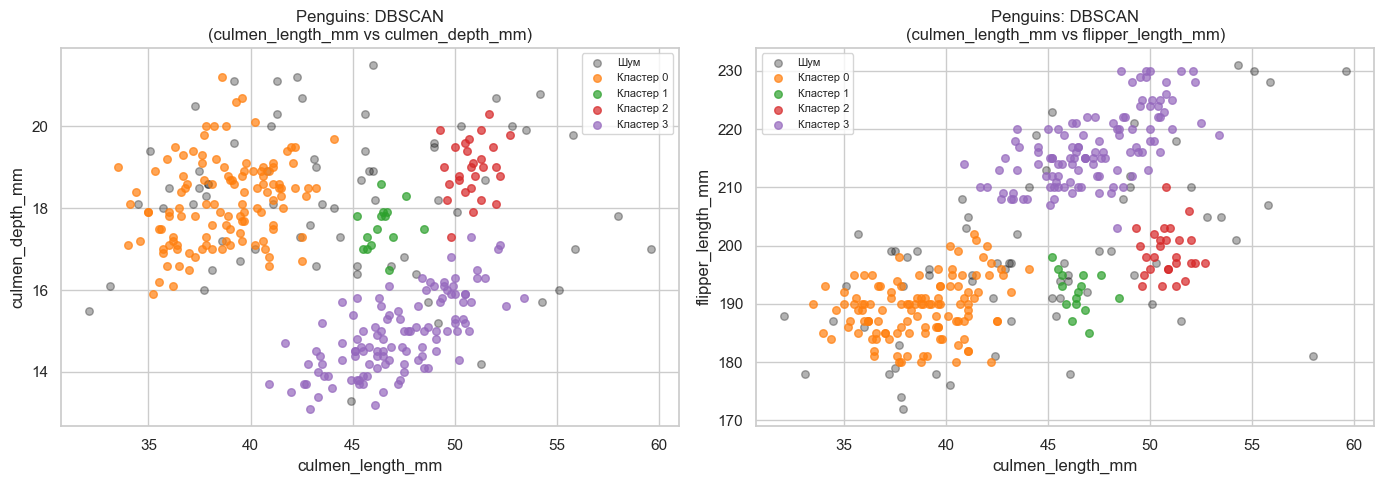


Коэффициент силуэта (без шума): 0.424


In [11]:
# 2.5. DBSCAN на данных penguins: эксперименты с eps и min_samples

# Базовые параметры (меняйте и перезапускайте ячейку, чтобы видеть эффект)
_eps_p = 0.5
_min_samples_p = 5

dbscan_p = DBSCAN(eps=_eps_p, min_samples=_min_samples_p)
labels_dbscan_p = dbscan_p.fit_predict(X_penguins_scaled)

unique_labels_p = set(labels_dbscan_p)
n_clusters_dbscan_p = len([l for l in unique_labels_p if l != -1])
n_noise = (labels_dbscan_p == -1).sum()

print(f"DBSCAN: eps={_eps_p}, min_samples={_min_samples_p}")
print("Число найденных кластеров (без шума):", n_clusters_dbscan_p)
print(f"Число точек шума: {n_noise} ({100*n_noise/len(labels_dbscan_p):.1f}%)")
print("\nРаспределение по меткам:")
print(pd.Series(labels_dbscan_p).value_counts().sort_index())

# Визуализация в пространстве нескольких пар признаков
if len(num_cols) >= 2:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    colors = sns.color_palette("tab10", n_colors=len(unique_labels_p))
    
    for ax_idx, (x_col, y_col) in enumerate([(num_cols[0], num_cols[1]), 
                                               (num_cols[0], num_cols[2] if len(num_cols) >= 3 else num_cols[1])]):
        if ax_idx == 1 and len(num_cols) < 3:
            axes[ax_idx].axis('off')
            continue
            
        for lab, col in zip(sorted(unique_labels_p), colors):
            mask = labels_dbscan_p == lab
            if lab == -1:
                col = (0, 0, 0)
                label = "Шум"
                alpha = 0.3
            else:
                label = f"Кластер {lab}"
                alpha = 0.7
            axes[ax_idx].scatter(X_penguins[x_col][mask], X_penguins[y_col][mask],
                                c=[col], s=30, label=label, alpha=alpha)

        axes[ax_idx].set_title(f"Penguins: DBSCAN\n({x_col} vs {y_col})")
        axes[ax_idx].set_xlabel(x_col)
        axes[ax_idx].set_ylabel(y_col)
        axes[ax_idx].legend(fontsize=8)

    plt.tight_layout()
    plt.show()
else:
    print("Недостаточно числовых признаков для 2D визуализации.")

# Силуэт, если возможно вычислить (без шума)
if n_clusters_dbscan_p > 1 and len(set(labels_dbscan_p)) > 1:
    mask_non_noise_p = labels_dbscan_p != -1
    if len(set(labels_dbscan_p[mask_non_noise_p])) > 1:
        sil_dbscan_p = silhouette_score(X_penguins_scaled[mask_non_noise_p], labels_dbscan_p[mask_non_noise_p])
        print(f"\nКоэффициент силуэта (без шума): {sil_dbscan_p:.3f}")
    else:
        print("\nНедостаточно кластеров без шума для расчета силуэта.")
else:
    print("\nDBSCAN нашел недостаточно кластеров для расчета силуэта.")


### Эксперименты с параметрами DBSCAN

Ниже можно экспериментировать с разными значениями `eps` и `min_samples` для DBSCAN. Попробуйте разные комбинации и посмотрите, как меняется число кластеров и количество точек шума.


Результаты экспериментов с параметрами DBSCAN:


min_samples,3,5,7,10
eps,,,,
0.3,21,4,0,0
0.4,9,10,6,2
0.5,4,4,4,3
0.6,2,2,3,4
0.7,3,2,2,2


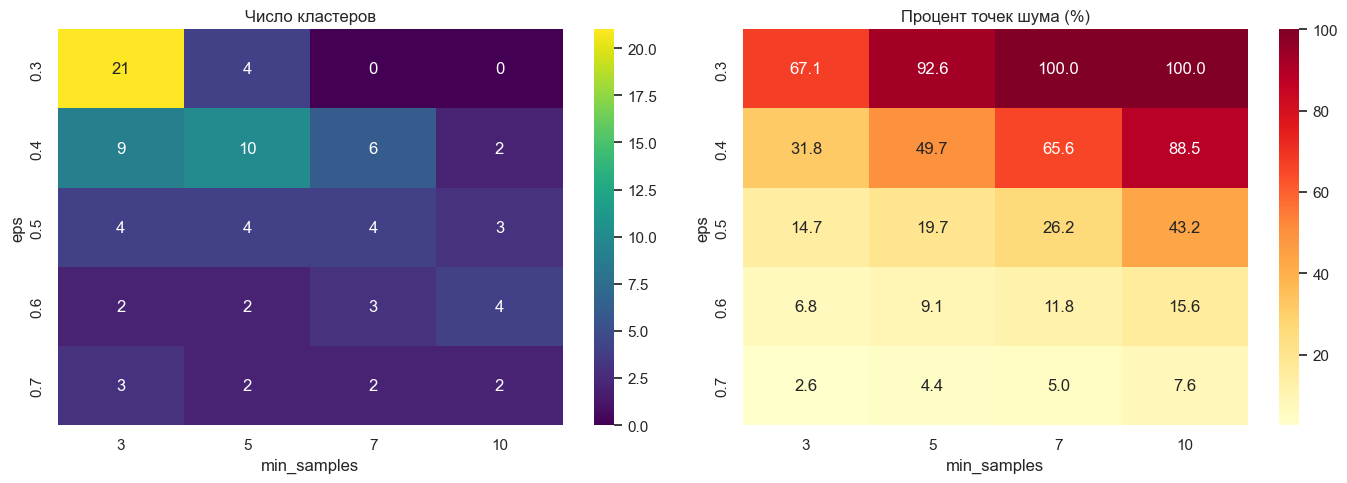


Рекомендация: выберите параметры, при которых:
- Число кластеров соответствует ожидаемому (обычно 3-4 для penguins)
- Процент шума не слишком высокий (< 20-30%)
- Процент шума не слишком низкий (если 0%, возможно eps слишком большой)


In [12]:
# 2.6. Эксперименты с параметрами DBSCAN для penguins

# Попробуйте разные комбинации параметров
eps_values = [0.3, 0.4, 0.5, 0.6, 0.7]
min_samples_values = [3, 5, 7, 10]

results = []

for eps in eps_values:
    for min_samp in min_samples_values:
        dbscan_test = DBSCAN(eps=eps, min_samples=min_samp)
        labels_test = dbscan_test.fit_predict(X_penguins_scaled)
        
        n_clusters = len(set(labels_test)) - (1 if -1 in labels_test else 0)
        n_noise = (labels_test == -1).sum()
        noise_pct = 100 * n_noise / len(labels_test)
        
        results.append({
            'eps': eps,
            'min_samples': min_samp,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_pct': noise_pct
        })

results_df = pd.DataFrame(results)
print("Результаты экспериментов с параметрами DBSCAN:")
display(results_df.pivot(index='eps', columns='min_samples', values='n_clusters'))

# Визуализация результатов
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Тепловая карта числа кластеров
pivot_clusters = results_df.pivot(index='eps', columns='min_samples', values='n_clusters')
sns.heatmap(pivot_clusters, annot=True, fmt='d', cmap='viridis', ax=axes[0])
axes[0].set_title('Число кластеров')
axes[0].set_xlabel('min_samples')
axes[0].set_ylabel('eps')

# Тепловая карта процента шума
pivot_noise = results_df.pivot(index='eps', columns='min_samples', values='noise_pct')
sns.heatmap(pivot_noise, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1])
axes[1].set_title('Процент точек шума (%)')
axes[1].set_xlabel('min_samples')
axes[1].set_ylabel('eps')

plt.tight_layout()
plt.show()

print("\nРекомендация: выберите параметры, при которых:")
print("- Число кластеров соответствует ожидаемому (обычно 3-4 для penguins)")
print("- Процент шума не слишком высокий (< 20-30%)")
print("- Процент шума не слишком низкий (если 0%, возможно eps слишком большой)")


## Выводы и сравнение методов

**Описание блока:** Проводим итоговое сравнение результатов применения методов KMeans и DBSCAN к датасету penguins.

**Сравниваемые аспекты:**
- Число найденных кластеров
- Метрики качества (инерция, коэффициент силуэта)
- Наличие точек шума
- Преимущества и недостатки каждого метода

**Цель:** Сделать выводы о применимости каждого метода для данного типа данных и определить, какой метод лучше подходит для конкретной задачи.


In [13]:
# Сравнение результатов KMeans и DBSCAN для penguins

print("=" * 60)
print("СРАВНЕНИЕ МЕТОДОВ КЛАСТЕРИЗАЦИИ ДЛЯ ДАТАСЕТА PENGUINS")
print("=" * 60)

print("\n1. K-MEANS:")
print(f"   - Число кластеров: {best_k}")
print(f"   - Инерция: {kmeans_p.inertia_:.2f}")
print(f"   - Коэффициент силуэта: {silhouette_score(X_penguins_scaled, labels_kmeans_p):.3f}")
print(f"   - Все точки распределены по кластерам (шума нет)")

print("\n2. DBSCAN:")
print(f"   - Параметры: eps={_eps_p}, min_samples={_min_samples_p}")
print(f"   - Число кластеров: {n_clusters_dbscan_p}")
print(f"   - Число точек шума: {n_noise} ({100*n_noise/len(labels_dbscan_p):.1f}%)")
if n_clusters_dbscan_p > 1:
    mask_non_noise_p = labels_dbscan_p != -1
    if len(set(labels_dbscan_p[mask_non_noise_p])) > 1:
        sil_dbscan_p = silhouette_score(X_penguins_scaled[mask_non_noise_p], labels_dbscan_p[mask_non_noise_p])
        print(f"   - Коэффициент силуэта (без шума): {sil_dbscan_p:.3f}")

print("\n" + "=" * 60)
print("ОСОБЕННОСТИ МЕТОДОВ:")
print("=" * 60)
print("\nK-Means:")
print("  + Требует задать число кластеров заранее")
print("  + Работает быстро даже на больших данных")
print("  + Все точки распределяются по кластерам")
print("  - Не может находить кластеры произвольной формы")
print("  - Чувствителен к выбросам")
print("  - Предполагает сферические кластеры")

print("\nDBSCAN:")
print("  + Может находить кластеры произвольной формы")
print("  + Автоматически определяет число кластеров")
print("  + Устойчив к выбросам (помечает их как шум)")
print("  - Требует подбора параметров eps и min_samples")
print("  - Может не работать хорошо при разных плотностях кластеров")
print("  - Медленнее на больших данных")

print("\n" + "=" * 60)


СРАВНЕНИЕ МЕТОДОВ КЛАСТЕРИЗАЦИИ ДЛЯ ДАТАСЕТА PENGUINS

1. K-MEANS:
   - Число кластеров: 3
   - Инерция: 373.93
   - Коэффициент силуэта: 0.451
   - Все точки распределены по кластерам (шума нет)

2. DBSCAN:
   - Параметры: eps=0.5, min_samples=5
   - Число кластеров: 4
   - Число точек шума: 26 (7.6%)
   - Коэффициент силуэта (без шума): 0.424

ОСОБЕННОСТИ МЕТОДОВ:

K-Means:
  + Требует задать число кластеров заранее
  + Работает быстро даже на больших данных
  + Все точки распределяются по кластерам
  - Не может находить кластеры произвольной формы
  - Чувствителен к выбросам
  - Предполагает сферические кластеры

DBSCAN:
  + Может находить кластеры произвольной формы
  + Автоматически определяет число кластеров
  + Устойчив к выбросам (помечает их как шум)
  - Требует подбора параметров eps и min_samples
  - Может не работать хорошо при разных плотностях кластеров
  - Медленнее на больших данных



**Итоговые выводы:**

**Сравнение результатов для датасета penguins:**
- **KMeans** нашёл 3 кластера с коэффициентом силуэта 0.451, что соответствует ожидаемому числу видов пингвинов.
- **DBSCAN** нашёл 4 кластера с коэффициентом силуэта 0.424, но при этом поместил 19.7% точек в шум.

**Выбор метода:**
- Для данного датасета **KMeans показал лучшие результаты** по метрике силуэта и интерпретируемости.
- KMeans лучше подходит, когда известно или ожидается определённое число кластеров и данные имеют сферическую структуру.
- DBSCAN полезен, когда нужно автоматически определить число кластеров и выявить выбросы, но требует тщательной настройки параметров.

**Общие рекомендации:**
- Для данных с известной структурой и ожидаемым числом кластеров предпочтительнее KMeans.
- Для данных с неизвестной структурой, выбросами и кластерами произвольной формы лучше использовать DBSCAN.
- Оба метода требуют предобработки данных (масштабирование) для корректной работы.
